In [1]:
#importing the required libraries
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np
from numpy import genfromtxt
import pandas as pd
from pandas import Series
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
#reading data from csv file 
headers = ['Date','Open','High','Low','Close','Volume']
data = pd.read_csv('stock_data.csv',sep=',',names=headers)
data.head()

,Date,Open,High,Low,Close,Volume
0,1/1/2017,1443.38,1476.82,1443.80,1465.72,561280000.0
1,1/2/2017,1465.72,1484.89,1465.72,1482.85,494264992.0
2,1/3/2017,1482.85,1484.26,1456.69,1456.82,385836992.0
3,1/4/2017,1456.82,1462.83,1442.51,1457.82,320670016.0
4,1/5/2017,1457.82,1465.72,1451.36,1454.14,326768000.0


In [2]:
date = pd.to_datetime(data['Date'])
dataset=data['Close'].to_frame()
dataset=dataset.set_index(date)
dataset = dataset.resample('W').mean()
print(dataset)

               Close
Date                
2017-01-01  1465.720
2017-01-08  1459.816
2017-01-15  1473.992
2017-01-22  1463.952
2017-01-29  1415.655
...              ...
2019-12-08  1123.898
2019-12-15  1160.444
2019-12-22  1152.135
2019-12-29  1166.532
2020-01-05  1166.990

[158 rows x 1 columns]


C:\Users\himal\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


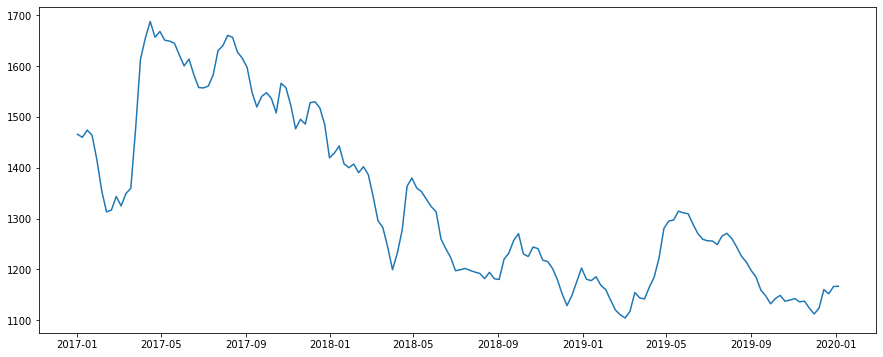

In [3]:
plt.rcParams['figure.figsize']=(15,6)
plt.plot(dataset)
plt.show()

In [4]:
#loading the data into respective array
train=dataset.iloc[0:127]
test=dataset.iloc[126:158]
print(train)
print(test)

               Close
Date                
2017-01-01  1465.720
2017-01-08  1459.816
2017-01-15  1473.992
2017-01-22  1463.952
2017-01-29  1415.655
...              ...
2019-05-05  1295.245
2019-05-12  1297.056
2019-05-19  1314.668
2019-05-26  1311.328
2019-06-02  1309.496

[127 rows x 1 columns]
                  Close
Date                   
2019-06-02  1309.496000
2019-06-09  1288.903333
2019-06-16  1270.424000
2019-06-23  1259.346000
2019-06-30  1256.300000
2019-07-07  1255.972000
2019-07-14  1248.958000
2019-07-21  1265.932000
2019-07-28  1271.038000
2019-08-04  1260.880000
2019-08-11  1244.314000
2019-08-18  1225.936000
2019-08-25  1214.484000
2019-09-01  1198.014000
2019-09-08  1185.108000
2019-09-15  1159.336000
2019-09-22  1148.254000
2019-09-29  1132.402000
2019-10-06  1142.840000
2019-10-13  1149.010000
2019-10-20  1137.498000
2019-10-27  1139.782500
2019-11-03  1142.730000
2019-11-10  1136.300000
2019-11-17  1137.600000
2019-11-24  1124.026000
2019-12-01  1112.468000
2019-12

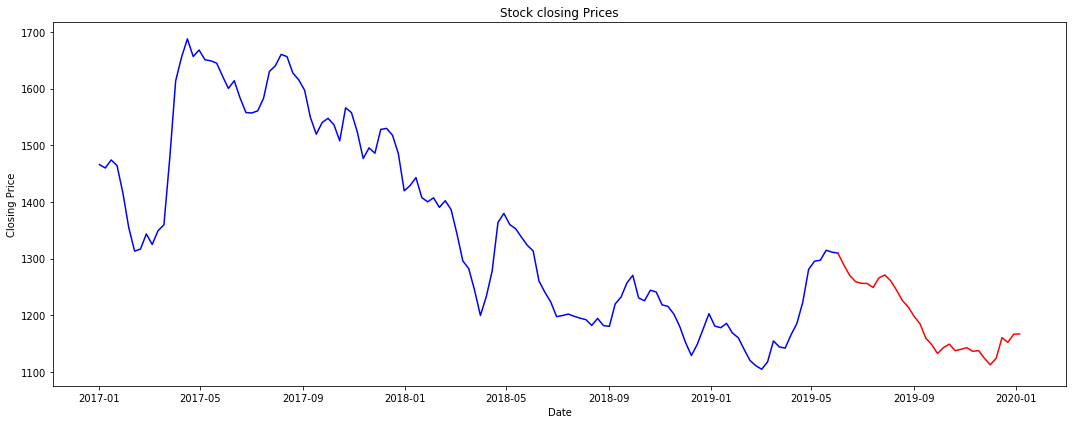

In [5]:
#plotting the data
plt.plot(train, linestyle='solid',color='blue')
plt.plot(test, linestyle='solid',color='red')
plt.title('Stock closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

In [6]:
#Determining rolling Statistics
rolmean= train.rolling(window=5).mean()
rolstd= train.rolling(window=5).std()
print(rolmean,rolstd)

                Close
Date                 
2017-01-01        NaN
2017-01-08        NaN
2017-01-15        NaN
2017-01-22        NaN
2017-01-29  1455.8270
...               ...
2019-05-05  1229.9199
2019-05-12  1256.2427
2019-05-19  1282.1058
2019-05-26  1299.8010
2019-06-02  1305.5586

[127 rows x 1 columns]                 Close
Date                 
2017-01-01        NaN
2017-01-08        NaN
2017-01-15        NaN
2017-01-22        NaN
2017-01-29  23.041029
...               ...
2019-05-05  57.097302
2019-05-12  49.814192
2019-05-19  35.247023
2019-05-26  13.663219
2019-06-02   8.809580

[127 rows x 1 columns]


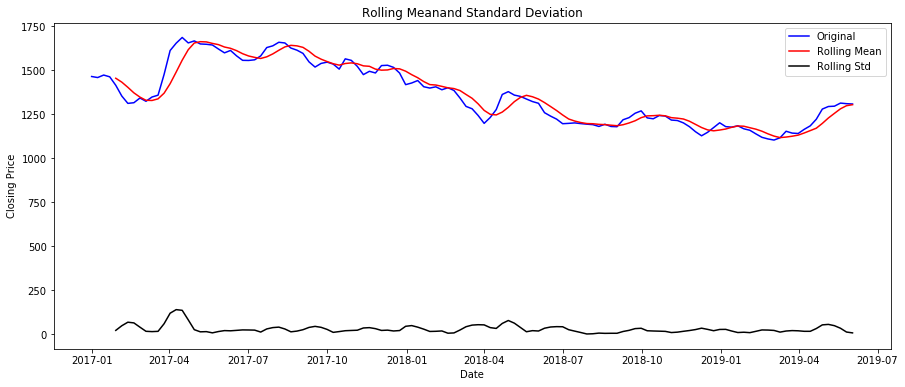

In [7]:
#plotting rolling statistics
orig=plt.plot(train,color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="black",label="Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Meanand Standard Deviation")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show(block=False)

In [8]:
#perform dicky fulller test
from statsmodels.tsa.stattools import adfuller
print("Results of Dicky-Fuller Test")
dftest=adfuller(train['Close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Tset Statistics','p-value','# Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)       


Results of Dicky-Fuller Test
Tset Statistics                -1.663703
p-value                         0.449904
# Lags Used                     1.000000
Number of Observation Used    125.000000
Critical Value (1%)            -3.483779
Critical Value (5%)            -2.884954
Critical Value (10%)           -2.579257
dtype: float64


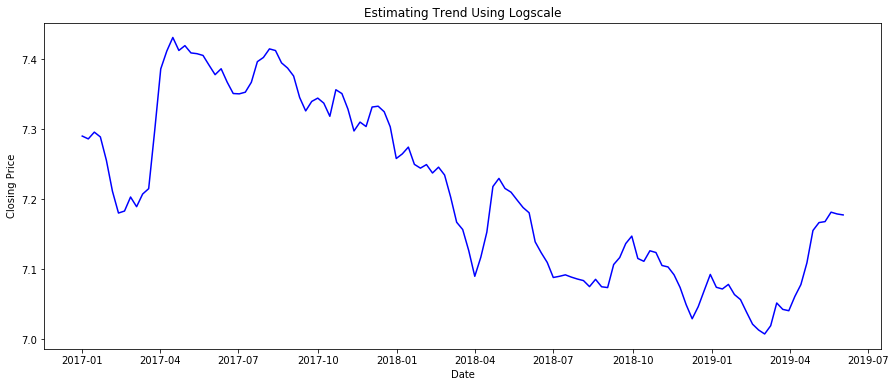

In [9]:
#Estimating Trend 
close_logScale=np.log(train)
plt.plot(close_logScale,color='blue')
plt.title("Estimating Trend Using Logscale")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show(block=False)

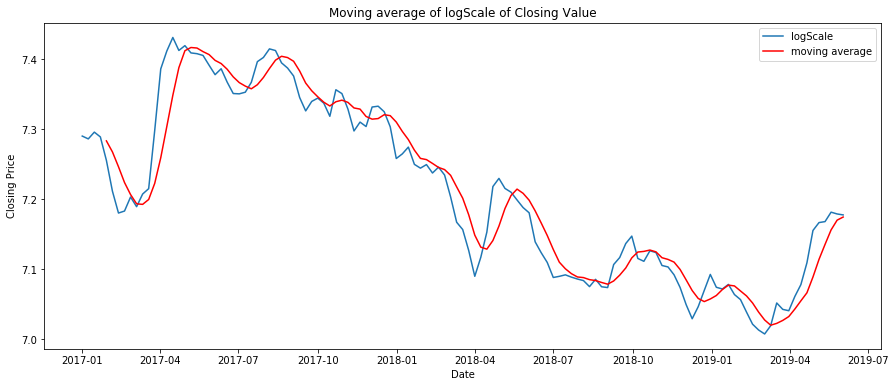

In [10]:
#moving average of logScale of closing vallue
movingAverage=close_logScale.rolling(window=5).mean()
movingSTD=close_logScale.rolling(window=5).std()
plt.title("Moving average of logScale of Closing Value")
plt.plot(close_logScale,label="logScale")
plt.plot(movingAverage,color="red",label="moving average")
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show(block=False)


In [11]:
#differencing of moving average from closing value logScale
close_logScaleMinusMovingAverage=close_logScale-movingAverage
close_logScaleMinusMovingAverage.dropna(inplace=True)
close_logScaleMinusMovingAverage

,Close
Date,
2017-01-29,-0.027880
2017-02-05,-0.056189
2017-02-12,-0.066175
2017-02-19,-0.040760
2017-02-26,-0.003535
...,...
2019-05-05,0.052612
2019-05-12,0.032610
2019-05-19,0.025388


In [12]:
def test_stationarity(timeseries):
    
    #determining moving average
    movingAverage=timeseries.rolling(window=5).mean()
    movingSTD=timeseries.rolling(window=5).std()
    
    #plot rolling statistics
    plt.title("Rolling mean and Standard Deviation")
    plt.plot(timeseries,color="blue",label="Original")
    plt.plot(movingAverage,color="red",label="Rolling Mean")
    plt.plot(movingSTD,color="black",label="Rolling Std")
    plt.legend(loc="best")
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show(block=False)
    
    #perform Dicky-Fuller Test
    print("Results of Dicky-Fuller Test")
    dftest=adfuller(timeseries['Close'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Tset Statistics','p-value','# Lags Used','Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)       

    
    


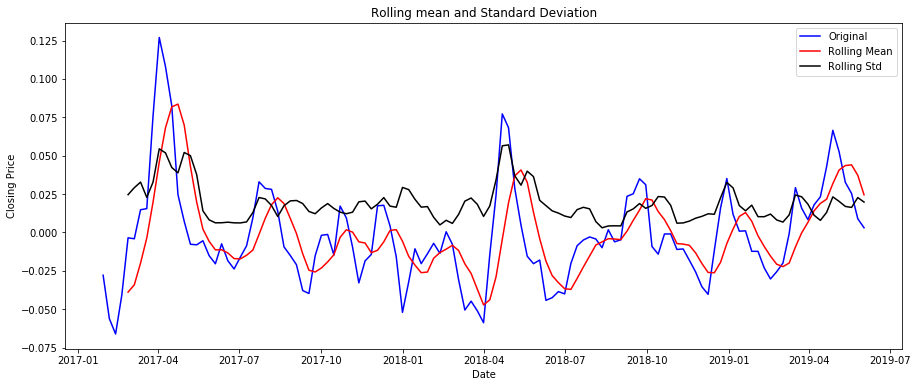

Results of Dicky-Fuller Test
Tset Statistics              -5.830164e+00
p-value                       3.992405e-07
# Lags Used                   1.000000e+00
Number of Observation Used    1.210000e+02
Critical Value (1%)          -3.485585e+00
Critical Value (5%)          -2.885739e+00
Critical Value (10%)         -2.579676e+00
dtype: float64


In [13]:
test_stationarity(close_logScaleMinusMovingAverage)

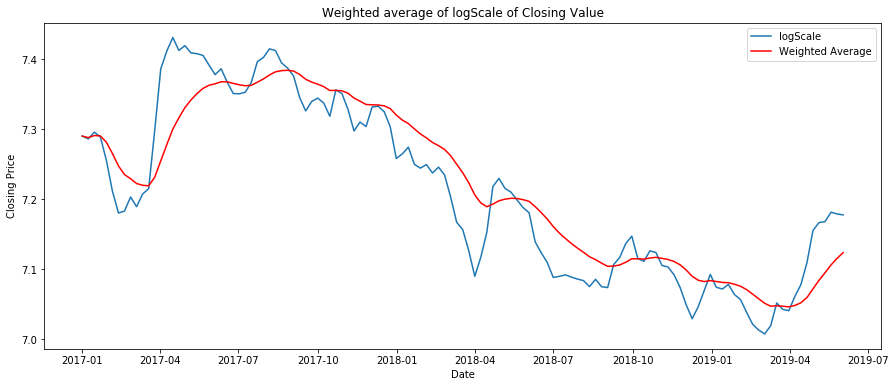

In [14]:
#calculating weighted average of time series
exponentialDecayWeightedAverage=close_logScale.ewm(halflife=5, min_periods=0, adjust=True).mean()
plt.plot(close_logScale,label='logScale')
plt.plot(exponentialDecayWeightedAverage,color='red',label="Weighted Average")
plt.title("Weighted average of logScale of Closing Value")
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show(block=False)

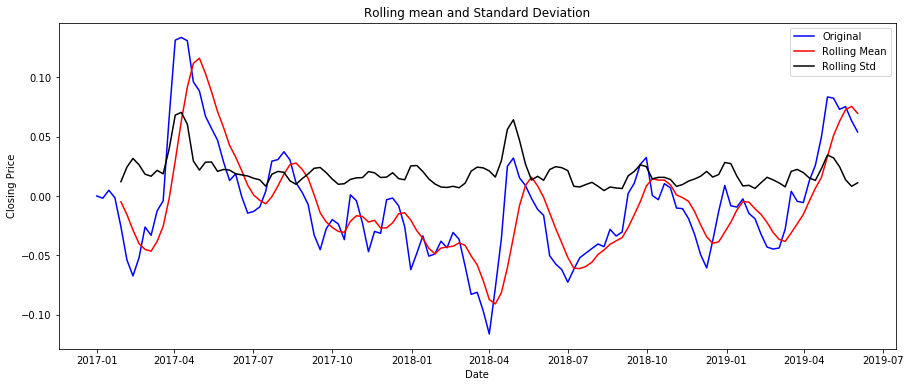

Results of Dicky-Fuller Test
Tset Statistics                -3.641725
p-value                         0.005012
# Lags Used                     1.000000
Number of Observation Used    125.000000
Critical Value (1%)            -3.483779
Critical Value (5%)            -2.884954
Critical Value (10%)           -2.579257
dtype: float64


In [15]:
#differencing weighted average from logScale closing value
close_logscaleMinusMovingDecayAverage=close_logScale-exponentialDecayWeightedAverage
test_stationarity(close_logscaleMinusMovingDecayAverage)

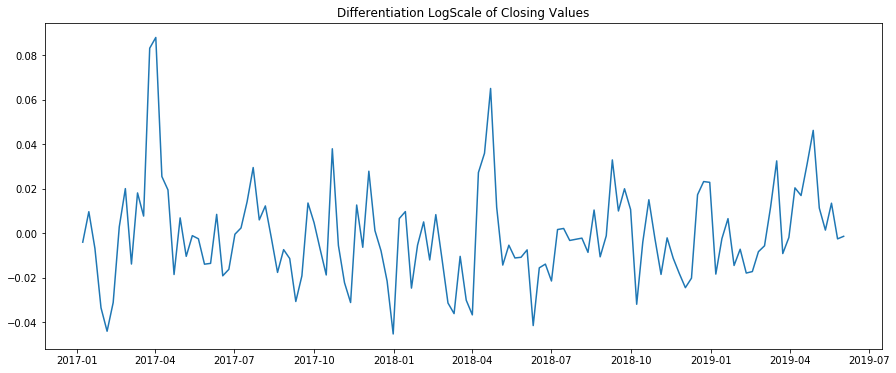

In [16]:
#differentiating Logscale indexed close dataset
datasetLogDiffShifting=close_logScale.diff()
plt.title('Differentiation LogScale of Closing Values')
plt.plot(datasetLogDiffShifting)
plt.show()


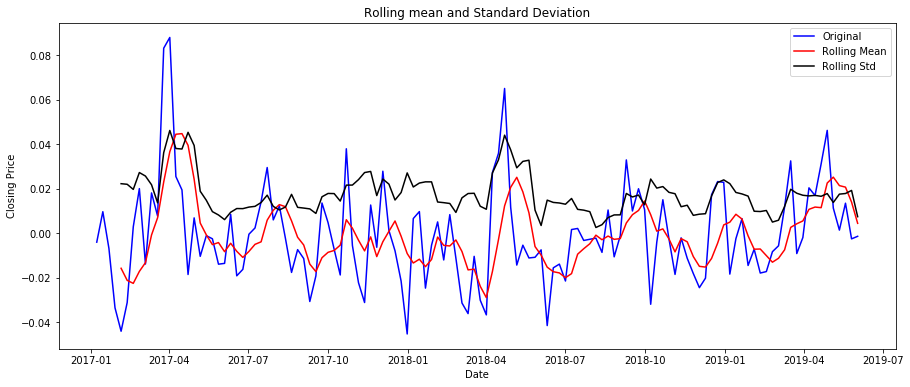

Results of Dicky-Fuller Test
Tset Statistics              -6.825572e+00
p-value                       1.951865e-09
# Lags Used                   0.000000e+00
Number of Observation Used    1.250000e+02
Critical Value (1%)          -3.483779e+00
Critical Value (5%)          -2.884954e+00
Critical Value (10%)         -2.579257e+00
dtype: float64


In [17]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

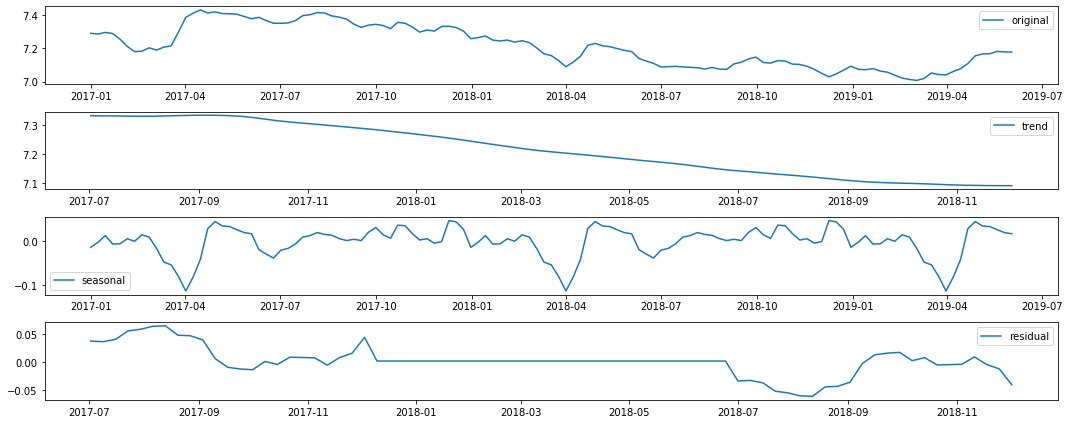

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(close_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(close_logScale, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()

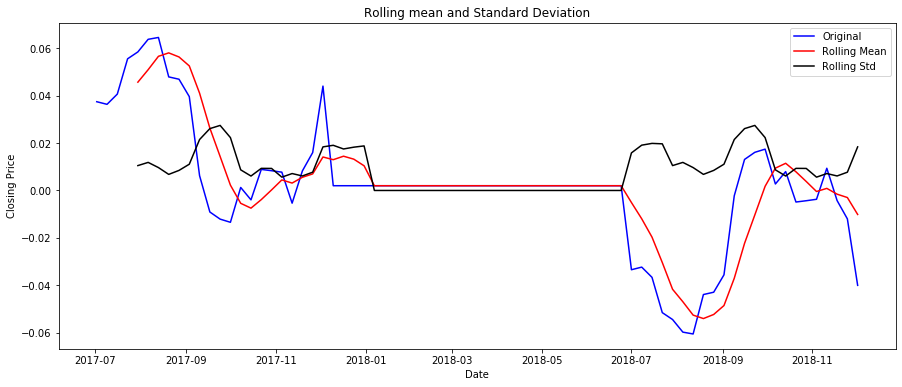

Results of Dicky-Fuller Test
Tset Statistics               -1.846439
p-value                        0.357662
# Lags Used                    0.000000
Number of Observation Used    74.000000
Critical Value (1%)           -3.521980
Critical Value (5%)           -2.901470
Critical Value (10%)          -2.588072
dtype: float64


In [19]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\Users\himal\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


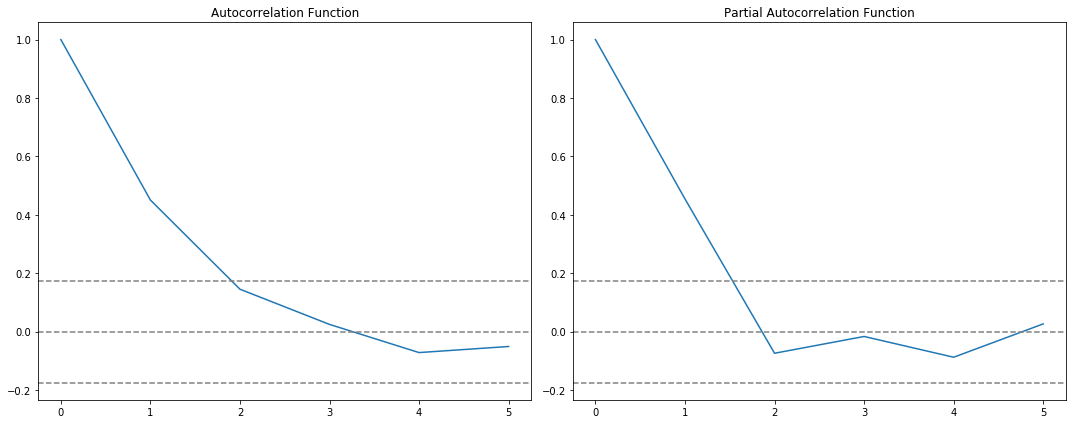

In [20]:
#calculating acf and pacf
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datasetLogDiffShifting,nlags=5)
lag_pacf=pacf(datasetLogDiffShifting,nlags=5)

#plotting acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plotting Pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

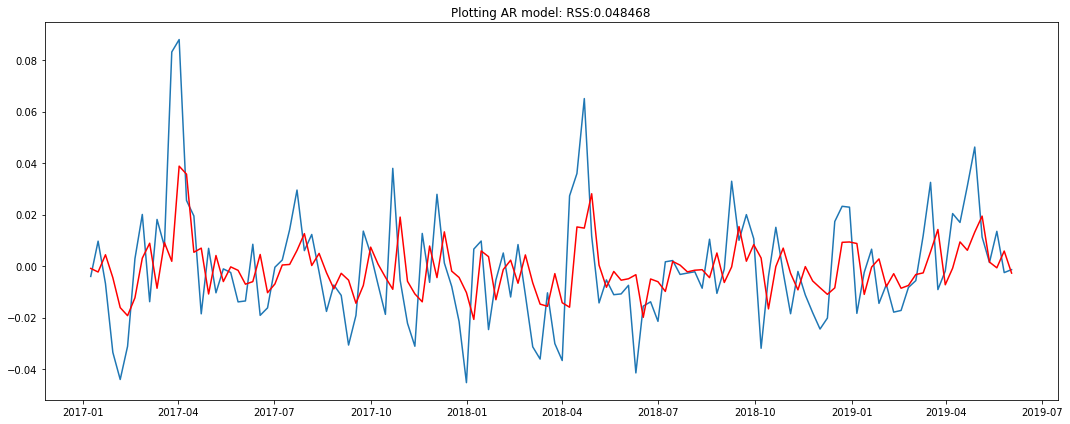

In [21]:

from statsmodels.tsa.arima_model import ARIMA
#AR model
model=ARIMA(close_logScale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('Plotting AR model: RSS:%4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Close'])**2))
plt.tight_layout()

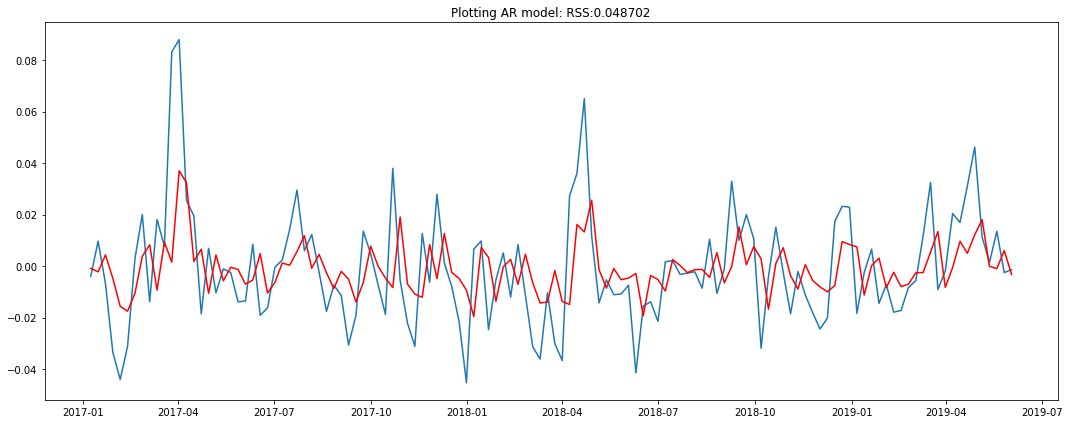

In [22]:
#MA model
model=ARIMA(close_logScale, order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('Plotting AR model: RSS:%4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Close'])**2))
plt.tight_layout()

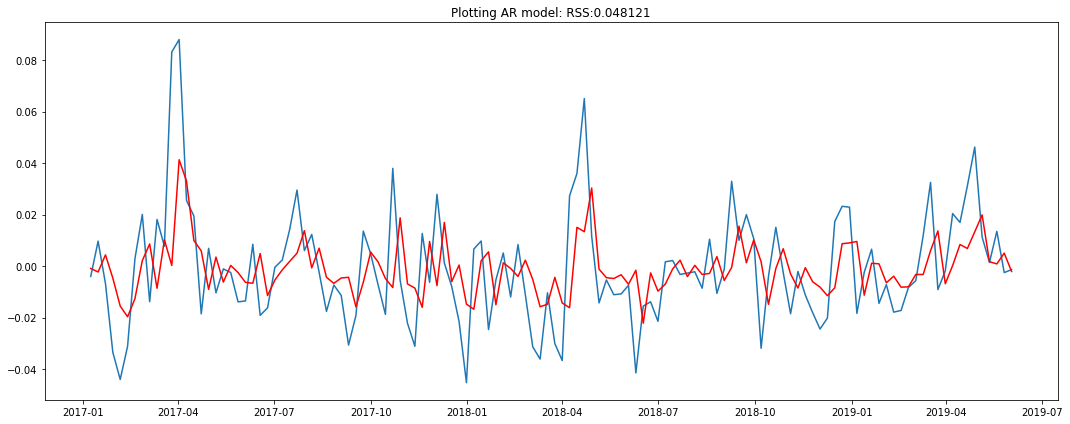

In [23]:
#ARIMA model
model=ARIMA(close_logScale, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('Plotting AR model: RSS:%4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Close'])**2))
plt.tight_layout()

In [24]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

Date
2017-01-08   -0.000927
2017-01-15   -0.002320
2017-01-22    0.004340
2017-01-29   -0.004728
2017-02-05   -0.015547
Freq: W-SUN, dtype: float64

In [25]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2017-01-08   -0.000927
2017-01-15   -0.003248
2017-01-22    0.001092
2017-01-29   -0.003636
2017-02-05   -0.019183
Freq: W-SUN, dtype: float64

In [26]:
predictions_ARIMA_log=pd.Series(close_logScale['Close'].iloc[0],index=close_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2017-01-01    7.290102
2017-01-08    7.289175
2017-01-15    7.286854
2017-01-22    7.291194
2017-01-29    7.286466
Freq: W-SUN, dtype: float64

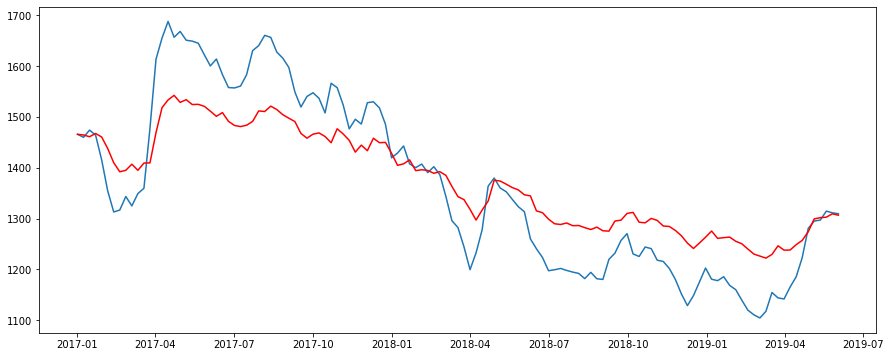

In [27]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(train)
plt.plot(predictions_ARIMA,color='red')

In [28]:
close_logScale

,Close
Date,
2017-01-01,7.290102
2017-01-08,7.286066
2017-01-15,7.295730
2017-01-22,7.288895
2017-01-29,7.255348
...,...
2019-05-05,7.166455
2019-05-12,7.167852
2019-05-19,7.181339


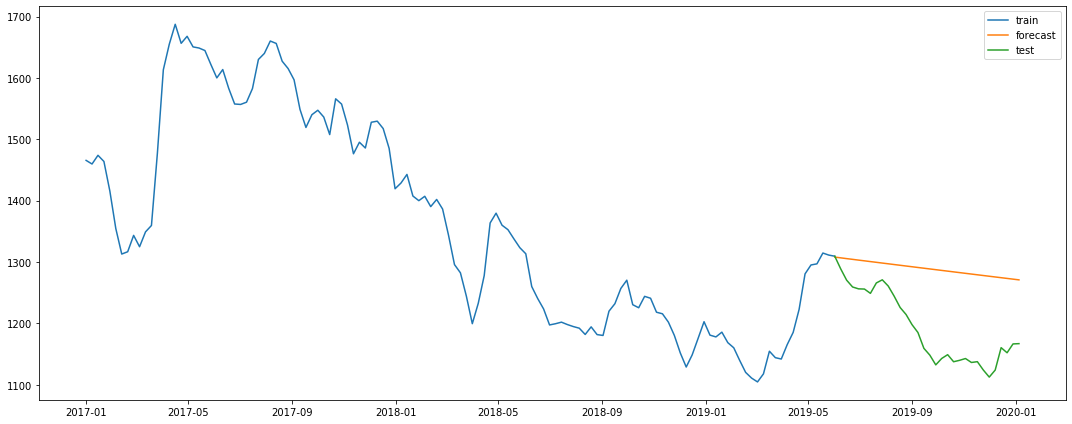

In [29]:
forecast=results_ARIMA.forecast(steps=32)
forecast=forecast[0]
forecast=np.exp(forecast)
plt.plot(train,label='train')
plt.plot(test.index,forecast,label='forecast')
plt.plot(test,label='test')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

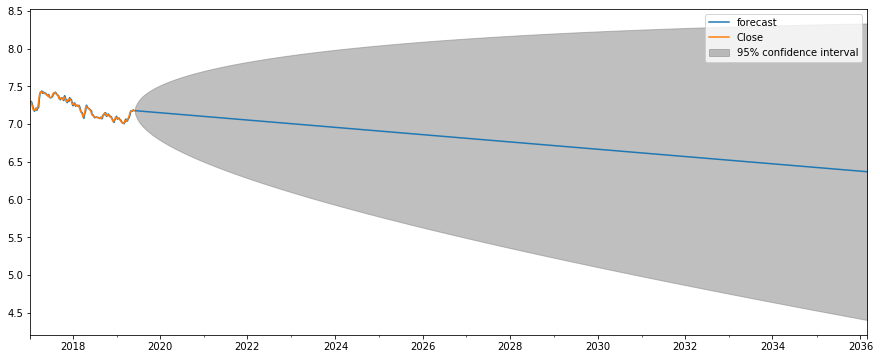

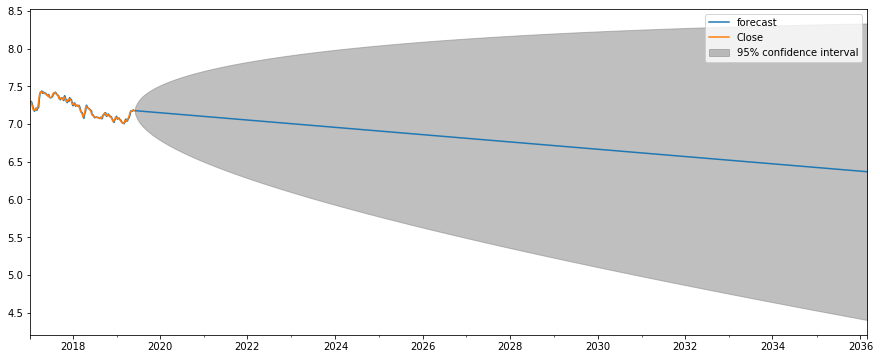

In [30]:
results_ARIMA.plot_predict(2,1000)

In [31]:
test.index

DatetimeIndex(['2019-06-02', '2019-06-09', '2019-06-16', '2019-06-23',
               '2019-06-30', '2019-07-07', '2019-07-14', '2019-07-21',
               '2019-07-28', '2019-08-04', '2019-08-11', '2019-08-18',
               '2019-08-25', '2019-09-01', '2019-09-08', '2019-09-15',
               '2019-09-22', '2019-09-29', '2019-10-06', '2019-10-13',
               '2019-10-20', '2019-10-27', '2019-11-03', '2019-11-10',
               '2019-11-17', '2019-11-24', '2019-12-01', '2019-12-08',
               '2019-12-15', '2019-12-22', '2019-12-29', '2020-01-05'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [32]:
forecast

array([1308.08252866, 1306.85129761, 1305.58498359, 1304.39900463,
       1303.15906609, 1301.97629371, 1300.74599275, 1299.5617406 ,
       1298.33813095, 1297.15246138, 1295.93453647, 1294.74801375,
       1293.53513034, 1292.34828549, 1291.13993777, 1289.95321594,
       1288.74899008, 1287.56275811, 1286.36231318, 1285.17687243,
       1283.97992715, 1282.79552497, 1281.60184714, 1280.41868638,
       1279.22808415, 1278.04633108, 1276.85864583, 1275.67843658,
       1274.49353704, 1273.31498293, 1272.13276034, 1270.95595229])

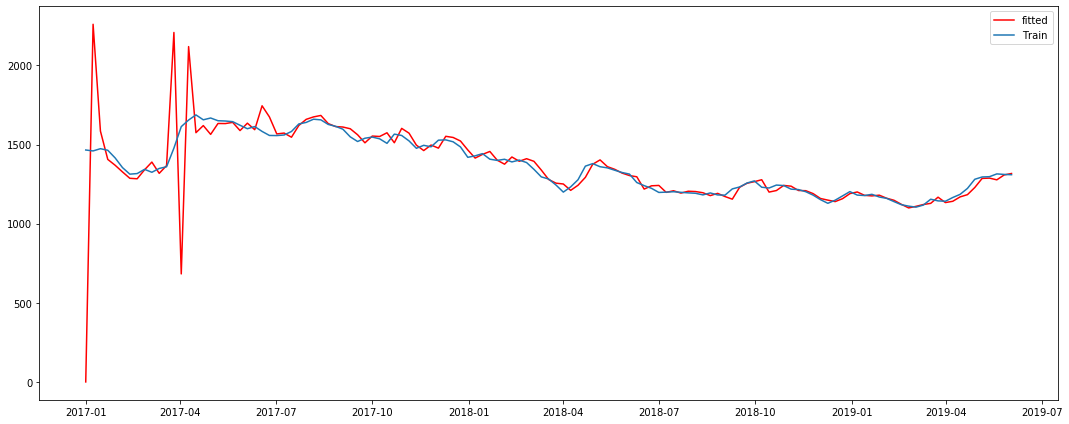

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(train,order=(2,1,2),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
results_SARIMA=mod.fit(maxiter=200)
plt.plot(train.index,results_SARIMA.fittedvalues, label='fitted',color='red')
plt.plot(train.index, train, label='Train')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

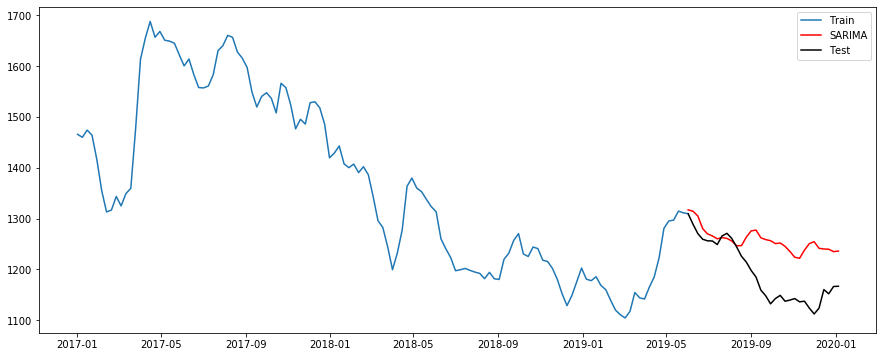

In [104]:
pred = results_SARIMA.predict(start=test.index[0], end=test.index[-1], dynamic=True)
plt.plot(train.index, train, label='Train')
plt.plot(pred.index, pred, label='SARIMA', color='r')
plt.plot(test.index, test, label='Test', color='k')
plt.legend(loc='best')
plt.show()

In [109]:
# report performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(test, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, pred))
print('RMSE: '+str(rmse))


MSE: 6225.589879773403
MAE: 65.47213718376005
RMSE: 78.90240731291665
MAPE: 2019-06-02 00:00:00   NaN
2019-06-09 00:00:00   NaN
2019-06-16 00:00:00   NaN
2019-06-23 00:00:00   NaN
2019-06-30 00:00:00   NaN
2019-07-07 00:00:00   NaN
2019-07-14 00:00:00   NaN
2019-07-21 00:00:00   NaN
2019-07-28 00:00:00   NaN
2019-08-04 00:00:00   NaN
2019-08-11 00:00:00   NaN
2019-08-18 00:00:00   NaN
2019-08-25 00:00:00   NaN
2019-09-01 00:00:00   NaN
2019-09-08 00:00:00   NaN
2019-09-15 00:00:00   NaN
2019-09-22 00:00:00   NaN
2019-09-29 00:00:00   NaN
2019-10-06 00:00:00   NaN
2019-10-13 00:00:00   NaN
2019-10-20 00:00:00   NaN
2019-10-27 00:00:00   NaN
2019-11-03 00:00:00   NaN
2019-11-10 00:00:00   NaN
2019-11-17 00:00:00   NaN
2019-11-24 00:00:00   NaN
2019-12-01 00:00:00   NaN
2019-12-08 00:00:00   NaN
2019-12-15 00:00:00   NaN
2019-12-22 00:00:00   NaN
2019-12-29 00:00:00   NaN
2020-01-05 00:00:00   NaN
Close                 NaN
dtype: float64


In [127]:
mape = np.mean(np.abs(pred - test)/np.abs(test))
print('MAPE: '+str(mape))

MAPE: 0.06502777540250747


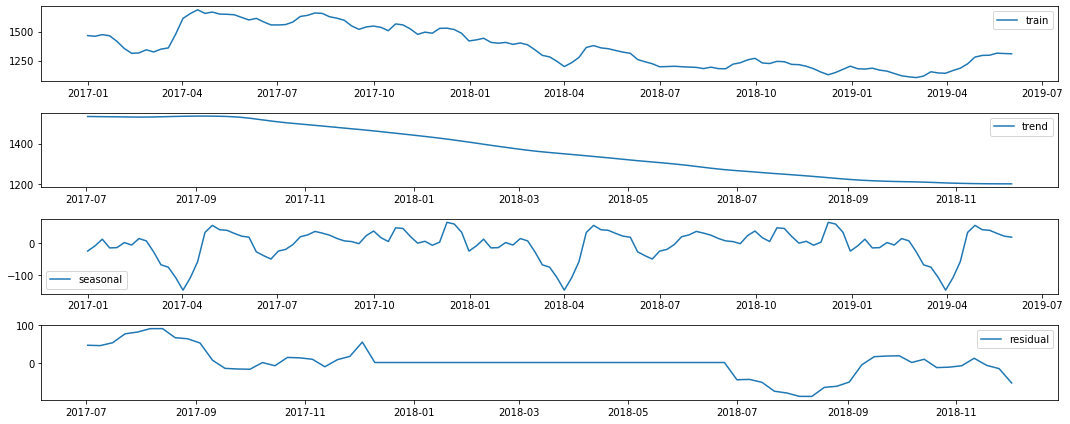

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(train, label='train')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()

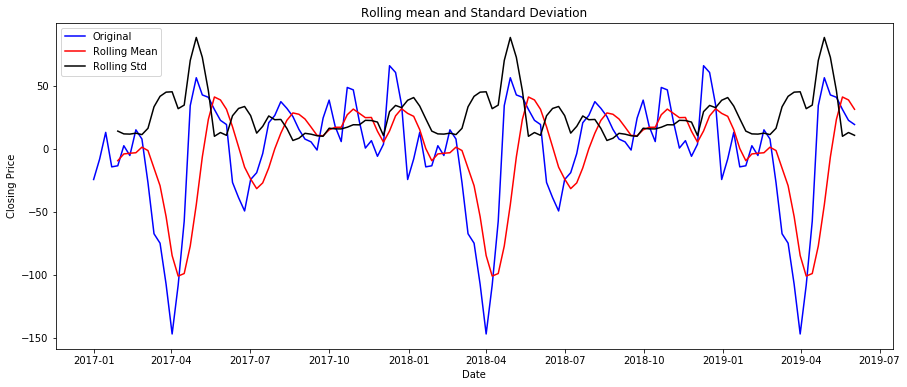

Results of Dicky-Fuller Test
Tset Statistics              -5.694823e+00
p-value                       7.918357e-07
# Lags Used                   1.000000e+00
Number of Observation Used    1.250000e+02
Critical Value (1%)          -3.483779e+00
Critical Value (5%)          -2.884954e+00
Critical Value (10%)         -2.579257e+00
dtype: float64


In [76]:
test_stationarity(seasonal)

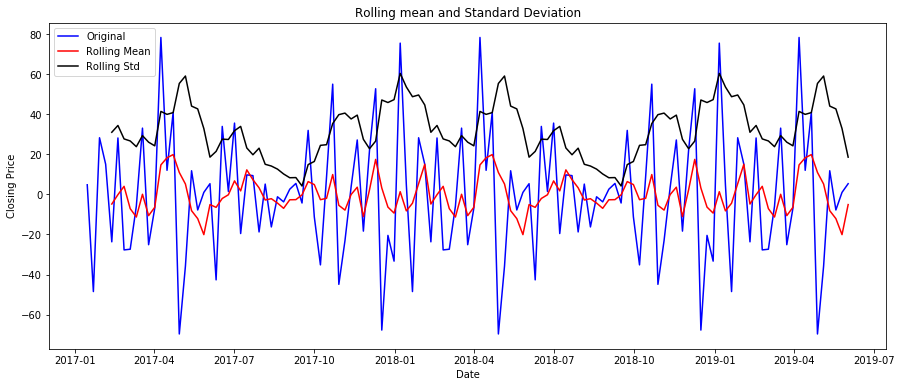

Results of Dicky-Fuller Test
Tset Statistics              -6.357447e+00
p-value                       2.522333e-08
# Lags Used                   1.200000e+01
Number of Observation Used    1.120000e+02
Critical Value (1%)          -3.490131e+00
Critical Value (5%)          -2.887712e+00
Critical Value (10%)         -2.580730e+00
dtype: float64


In [79]:
seasonal_diff=seasonal.diff().diff()
seasonal_diff.dropna(inplace=True)
test_stationarity(seasonal_diff)

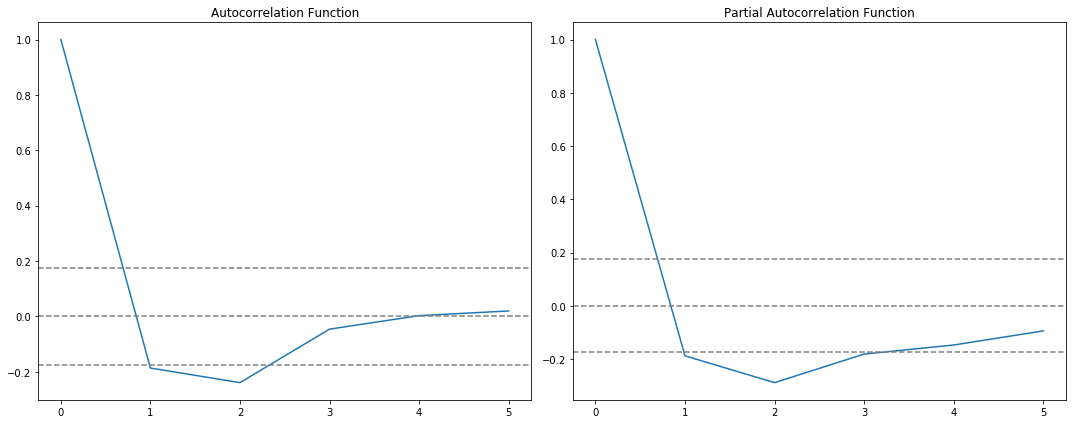

In [81]:
lag_acf=acf(seasonal_diff,nlags=5)
lag_pacf=pacf(seasonal_diff,nlags=5)

#plotting acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(seasonal_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(seasonal_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plotting Pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(seasonal_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(seasonal_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

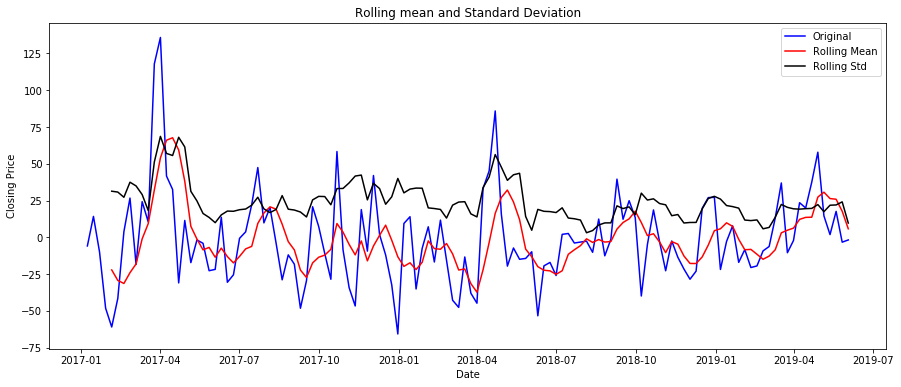

Results of Dicky-Fuller Test
Tset Statistics              -6.826558e+00
p-value                       1.941196e-09
# Lags Used                   0.000000e+00
Number of Observation Used    1.250000e+02
Critical Value (1%)          -3.483779e+00
Critical Value (5%)          -2.884954e+00
Critical Value (10%)         -2.579257e+00
dtype: float64


In [89]:
train_diff=train.diff()
train_diff.dropna(inplace=True)
test_stationarity(train_diff)

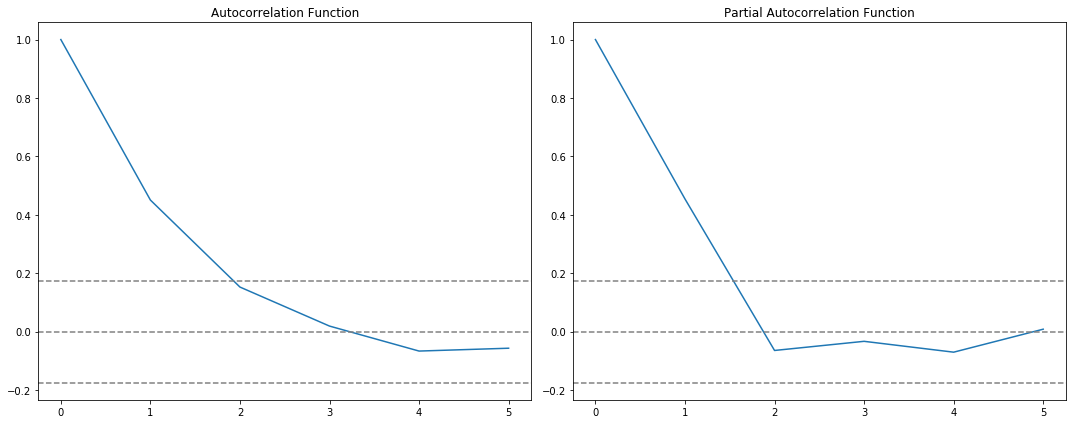

In [90]:
lag_acf=acf(train_diff,nlags=5)
lag_pacf=pacf(train_diff,nlags=5)

#plotting acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plotting Pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()